In [2]:
import torch
pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia_ami')

Using cache found in C:\Users\JOSEPH KURUVILLA/.cache\torch\hub\pyannote_pyannote-audio_master
Using cache found in C:\Users\JOSEPH KURUVILLA/.cache\torch\hub\pyannote_pyannote-audio_master
Using cache found in C:\Users\JOSEPH KURUVILLA/.cache\torch\hub\pyannote_pyannote-audio_master
Using cache found in C:\Users\JOSEPH KURUVILLA/.cache\torch\hub\pyannote_pyannote-audio_master
C:\ProgramData\Anaconda3\envs\pytorch_2\lib\site-packages\pyannote\audio\embedding\approaches\arcface_loss.py:170: FutureWarning: The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release
  warnings.warn(msg, FutureWarning)
Using cache found in C:\Users\JOSEPH KURUVILLA/.cache\torch\hub\pyannote_pyannote-audio_master


In [45]:
test_file = {'uri': 'filename', 'audio': 'F:/Boolean-Lab/speech-expresssion-analysis/demo-implementation/RC call records/20211014-143229_447598564519_442045187598#378_Automatic_732691738067.wav'}

In [46]:
diarization = pipeline(test_file)

C:\ProgramData\Anaconda3\envs\pytorch_2\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


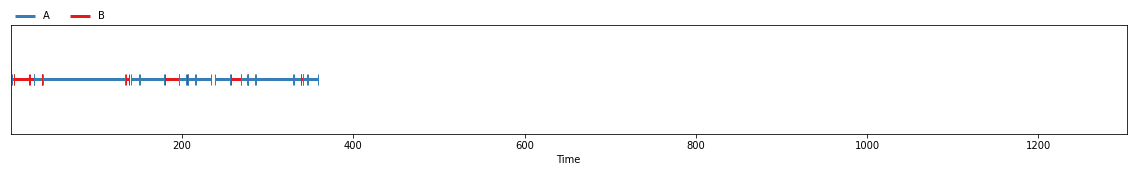

In [47]:
diarization

In [48]:
diarization.label_duration('A')

279.5883749999998

In [49]:
diarization.label_duration('B')

57.04762499999997

In [50]:
uri = 'filename'

In [51]:
for segment, _, label in diarization.itertracks(yield_label=True):
    line = (
        f"SPEAKER {uri} 1 {segment.start:.3f} {segment.duration:.3f} "
        f"<NA> <NA> {label} <NA> <NA>\n"
    )
    print(segment.start)
    #print(line)

1.3247187500000002
4.3217187500000005
22.187281249999998
26.74015625
36.39771875
37.31740625
134.11746875
139.98659375
150.95534375
180.23853125
196.09934375
205.49196874999998
206.84534374999998
216.71553125
238.53153125
256.99278125
269.08371875
276.59984375
277.43178125
286.66409375
330.91371875000004
339.00865624999994
340.99315624999997
346.91121875


In [39]:
with open("filename.rttm","w") as file:
    diarization.write_rttm(file)

In [10]:
from scipy.io import wavfile
 
def trim_wav( originalWavPath, newWavPath , start, end ):
    '''
    :param originalWavPath: the path to the source wav file
    :param newWavPath: output wav file * can be same path as original
    :param start: time in seconds
    :param end: time in seconds
    :return:
    '''
    sampleRate, waveData = wavfile.read( originalWavPath )
    startSample = int( start * sampleRate )
    endSample = int( end * sampleRate )
    Wav = waveData[startSample:endSample]
    return Wav,sampleRate
    #wavfile.write( newWavPath, sampleRate, waveData[startSample:endSample])

In [40]:
from pydub import AudioSegment

In [41]:
import scipy.io.wavfile as wavfile

In [52]:
originalWavPath = r'F:/Boolean-Lab/speech-expresssion-analysis/demo-implementation/RC call records/20211014-143229_447598564519_442045187598#378_Automatic_732691738067.wav'
newWavPathA = r'F:/Boolean-Lab/speech-expresssion-analysis/demo-implementation/trim-records/trimA.wav'
newWavPathB = r'F:/Boolean-Lab/speech-expresssion-analysis/demo-implementation/trim-records/trimB.wav'
wav_A  = AudioSegment.from_wav("welcome.wav")
wav_B = AudioSegment.from_wav("welcome.wav")
segments_A = [wav_A]
segments_B = [wav_B]
combined_A = AudioSegment.empty()
combined_B = AudioSegment.empty()
for segment, _, label in diarization.itertracks(yield_label=True):
    if label == 'A':
        sampleRate, waveData = wavfile.read( originalWavPath )
        startSample = int( segment.start * sampleRate )
        endSample = int( segment.end * sampleRate )
        Wav = waveData[startSample:endSample]
        wavfile.write(f'diarization_cluster_A.wav', sampleRate, Wav)
        wav_a = AudioSegment.from_wav('diarization_cluster_A.wav')
        segments_A.append(wav_a)
    elif label == 'B':
        sampleRate, waveData = wavfile.read( originalWavPath )
        startSample = int( segment.start * sampleRate )
        endSample = int( segment.end * sampleRate )
        Wav = waveData[startSample:endSample]
        wavfile.write(f'diarization_cluster_B.wav', sampleRate, Wav)
        wav_b = AudioSegment.from_wav('diarization_cluster_B.wav')
        segments_B.append(wav_b)
    #print(label)
    
for fname_a in segments_A:
    combined_A += fname_a
for fname_b in segments_B:
    combined_B += fname_b
combined_A.export(newWavPathA, format="wav")
combined_B.export(newWavPathB, format="wav")
# wavfile.write( newWavPathA, sampleRate, wav_A)        
# wavfile.write( newWavPathB, sampleRate, wav_B) 

<_io.BufferedRandom name='F:/Boolean-Lab/speech-expresssion-analysis/demo-implementation/trim-records/trimB.wav'>

In [ ]:
#!usr/local/bin/python
import glob
import sys
import os

from pydub import AudioSegment
dirpath = "news/"
headingsNewsDir = dirpath+"2019-03-01/"
includeDir = dirpath+"/include/"
generatedFile = "combined_news_file.wav"

filenames = glob.glob(headingsNewsDir+'*.wav')
welcome  = AudioSegment.from_wav(includeDir + "welcome.wav")
thankyou = AudioSegment.from_wav(includeDir + "thankyou.wav")
beep     = AudioSegment.from_wav(includeDir + "beep.wav")

filenameswithbeep = [welcome, beep]
combined = AudioSegment.empty()
for filename in filenames:
    audiofilename = AudioSegment.from_wav(filename)
    filenameswithbeep.extend([audiofilename, beep])

filenameswithbeep.extend([thankyou])

for fname in filenameswithbeep:
    combined += fname

combined.export(headingsNewsDir + generatedFile, format="wav")

In [52]:
originalWavPath = r'F:/Boolean-Lab/speech-expresssion-analysis/demo-implementation/RC call records/20210909-123609_442039972724_442085209300_Automatic_723566154067.wav'
newWavPath = r'F:/Boolean-Lab/speech-expresssion-analysis/demo-implementation/trim_records/trimB.wav'
trim_wav(originalWavPath, newWavPath, 173.302,263.172)